# Flights Data Exploration Challenge - Microsoft Azure ML learning path

**Table of Contents**

1. [Introduction](#1.-Introduction)
2. [Acquire data](#2.-Acquire-data)
3. [Inferential Statistics](#3.-Inferential-Statistics)
4. [Visualizations](#4.-Visualizations)
5. [Distributions](#5.-Distributions)
    

## 1. Introduction

I used a dataset that came from a Microsof Azure ML online course and it contains flights data from the Department of Transportation. I'll use it to practice some simple visualization techniques to apply several Python libraries, including pandas, numpy, matplotlib, and seaborn.
First, I'll start with acquiring the data, including loading the file, cleaning it and creating some Python objects to see some statistics about the dataset.

In [1]:
%load_ext watermark

## 2. Acquire data



First I'll start with some stater imports to load the data. 

In [2]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib
from adjustText import adjust_text
from matplotlib import pyplot as plt

Next I'll load the dataset on a pandas dataframe object.

In [3]:
df_flights = pd.read_csv('data/flights.csv')
df_flights.head(3)

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0


Below the description of the variables in the dataset.

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

I am interested in understanding the trends for delays in arrivals and departures across airlines and airports. I think that there are multiple uses for insights on the performance of airlines in terms of on-time departures and arrivals. But before starting any type of statistics, first I want to check the characteristics of the dataset, things like data types for each variable and counts.

In [4]:
#First I want to see the differences in columns for the counts of Nan values as well as the data type for each column
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

In [5]:
#count number of nan values per column
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

I can see that there are about 2.8 thousand records with missing values, so I'll proceed to drop those rows. Also, I'll drop all the rows for flights that were cancelled. 

In [6]:
#drop Nan rows and cancelled flights
df_flights = df_flights[~df_flights.isnull().any(axis=1)]#------>make a copy of the dataframe with rows that don't have null vals
df_flights = df_flights[df_flights['Cancelled']!=1]#------------>filter out cancelled flights

The dataset has been loaded, cleaned and is ready for further analysis.

## 3. Inferential Statistics

My goal for this phase is to gain some basic statistics from our dataset. Since we are interested specifically in arrival and departure performance, first I will get a statistical description of their distribution.

In [7]:
basic_stats= df_flights[['DepDelay','ArrDelay']].describe().T.round(2)
basic_stats

,count,mean,std,min,25%,50%,75%,max
DepDelay,269024.0,10.43,35.78,-63.0,-4.0,-1.0,9.0,1425.0
ArrDelay,269024.0,6.57,38.43,-75.0,-11.0,-3.0,10.0,1440.0


We can observe that the standard deviation is of ~10 and ~6.5 mins for departures and arrivals respectively, with 75% of the values being at below 9 and 10 mins respectively. 

Next I'll aggregate departure and arrival values by airlines and cities by creating a few groupby objects. 

In [105]:
#create certain groupby objects for means 
avg_delays_carrier= df_flights.groupby(['Carrier'])[['DepDelay','ArrDelay']].mean().round(2)
std_delays_carrier= df_flights.groupby(['Carrier'])[['DepDelay','ArrDelay']].std().round(2)
avg_delays_depCity= df_flights.groupby(['OriginCity'])[['DepDelay','ArrDelay']].mean().round(2)
avg_delays_dayofweek= df_flights.groupby(['DayOfWeek'])[['DepDelay','ArrDelay']].mean().round(2)

In [142]:
avg_delays_dayofweek.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 1 to 7
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DepDelay  7 non-null      float64
 1   ArrDelay  7 non-null      float64
dtypes: float64(2)
memory usage: 468.0 bytes


## 4. Visualizations
Now that we have several groupings with the means, I am going to create the __create_scatterplot__ function to plot average delays and departures by carrier and/or city. 

In [10]:
#create function to graph scatter plot
def create_scatterplot(data, x_data, y_data, adjust=False):
    import matplotlib.cm as cm
    plt.figure(figsize=(10,6))
    tones= np.arange(len(data[x_data].values))
    
    plt.scatter(x=data[x_data], y= data[y_data],s=55, alpha=0.7, edgecolor='b', c=tones, cmap='rocket_r')
    #for index, item in enumerate(data.index.values):
    annots= []
    for x, y, s in zip(data[x_data], data[y_data],data.index.values):
        annots.append(plt.text(x,y,s, size=9))
    plt.xlabel('{} in mins'.format(x_data))
    plt.ylabel('{} in mins'.format(y_data))
    #plt.title()
    if adjust:
            plt.title('{} and {}'.format(x_data, y_data), fontsize=12) 
            adjust_text(annots, arrowprops=dict(arrowstyle="->", color='k', lw=0.9))
    #plt.title('Arrival and Departure Delays by {}'.format(str(data.name)))
    return plt.show()

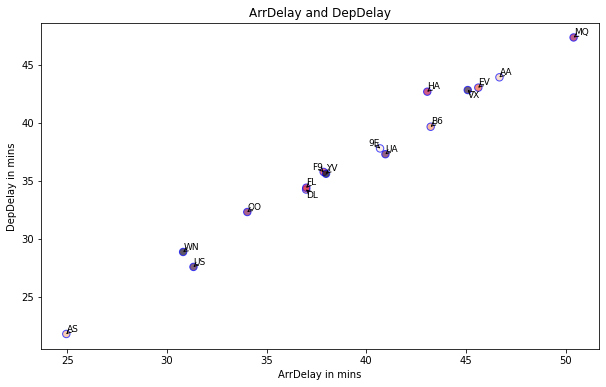

In [11]:
#scatterplot to visualize standard delay deviations
create_scatterplot(std_delays_carrier, 'ArrDelay', 'DepDelay', adjust=True)

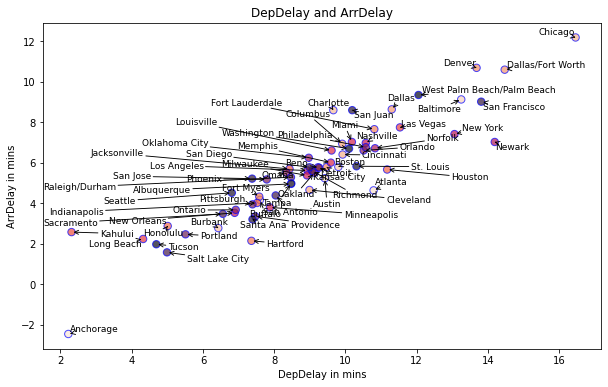

In [12]:
#scatterplot to visualize average delay by departure city
create_scatterplot(avg_delays_depCity, 'DepDelay', 'ArrDelay', adjust=True)

We have now an idea of the average delays for departures and arrivals by airline and by city. This information can already be useful to my travel plans, like what airport to depart from and arrive to or the airline carrier on-time performance.

I think it'd be interesting to see barplots for each airline showing their on-time performance starting with the worst performers. 

In [160]:
def create_barplot(data, var1, var2, adjust=False, debug=False): #----->variables are:dataframe, str for column header name for v1 and v2 respectively
    fig, ax= plt.subplots()
    width= 0.35
    ticks= np.arange(len(data.index.values)) 
    departures = ax.bar(ticks - width/2, data[var1].sort_values(ascending=False), width, alpha=0.75, label=var1)
    plt.xlabel('Average Delays')
    arrivals = ax.bar(ticks + width/2, data[var2].sort_values(ascending=False), width, color='green', alpha=0.6, label=var2)
    plt.ylabel('mins')
    
    #add labels to departures
    if adjust: 
        annots=[]
        for j, rect in enumerate(departures):
            left= rect.get_x()
            top= rect.get_y() + rect.get_height() 
            annots.append(ax.text(left,top, round(data[var1][j],1), size=9))

        annots1=[]
        #add labels to arrivals    
        for j, rect in enumerate(arrivals):
            left= rect.get_x()-0.1
            top= rect.get_y() + rect.get_height()
            annots1.append(ax.text(left,top, round(data[var2][j],1), size=9))
        
        adjust_text(annots, add_ojects=departures, autoalign=True)
        adjust_text(annots1, add_ojects=arrivals, autoalign=True)
    
    else:
        ax.bar_label(departures)
        ax.bar_label(arrivals)
        
    if debug: 
        print(data.index.values)
    
    ax.set_xticks(ticks)
    ax.set_xticklabels(data.index.values)
    plt.xticks(rotation=90)
        
    
        
    ax.legend(frameon=False, bbox_to_anchor=(1.01,1))
    plt.title('{} & {} for Relevant Variable'.format(var1, var2))
    plt.show()

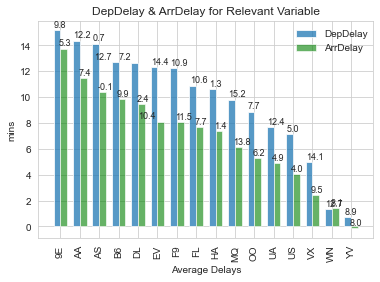

In [161]:
#let's visualize the average delay for departures and arrivals by airline carrier
create_barplot(avg_delays_carrier, 'DepDelay','ArrDelay', adjust=True, debug=False)

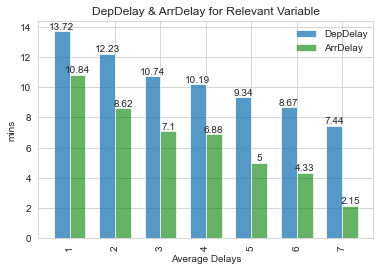

In [162]:
create_barplot(avg_delays_dayofweek, 'DepDelay','ArrDelay', adjust=False, debug=False)

In [15]:
carrier_counts= df_flights.groupby(['Carrier'])[['DepDelay','ArrDelay']].count().round(2)
carrier_counts.sort_values(by='DepDelay').T

Carrier,HA,F9,VX,YV,AS,9E,FL,MQ,B6,EV,OO,US,UA,AA,DL,WN
DepDelay,1877,3533,3534,5121,6751,7736,9320,11083,12343,15448,15907,23400,28455,28631,38401,57484
ArrDelay,1877,3533,3534,5121,6751,7736,9320,11083,12343,15448,15907,23400,28455,28631,38401,57484


## 5. Distributions

On the object __basic_stats__ we can observe a large variance above the 75th percentile and below the 25th percentile My intent is to create a distribution plot for delays that also graphs quantiles, giving a good visual way to understand our dataset. 

In [16]:
#define function that creates probability density plot
def distribution(data, col, low=False, high=False, debug=False):
    #data is the entire dataframe
    #col is the variable of interest for our distribution
    #low is the lower percentile that we want to see and high is the upper percentile
    
    from matplotlib import pyplot as plt
    import scipy.stats as stats, numpy as np
    
    #instantiate figure
    fig= plt.figure(figsize=(10,4))
       
    #drop the most extreme values
    qlow= data[col].quantile(0)
    qhigh= data[col].quantile(0.99)
    data= data[(data[col]<qhigh)& (data[col]>qlow)]
    
    if debug:
        print(data)
    
    #density plot
    plt.hist(data[col], bins=35, density=True, alpha=0.75,
             label=('Frequency Distribution\nof {}'.format(col)))
        
    #obtain sample parameters
    mean, st_d = np.mean(data[col]), np.std(data[col])
    mode= stats.mode(data[col])[0]
    min_val= data[col].min()
    max_val= data[col].max()
    
    if debug:
        print(mean, st_d, min_val, max_val)
        
    #create normal curve using sample parameters
    x_normal = np.linspace(mean-3*st_d, mean+3*st_d)
    plt.plot(x_normal, stats.norm.pdf(x_normal, mean, st_d), color='r', 
             label='Normal Distribution - mean: {:.1f}\nst dev:{:.1f}'.format(round(mean,2),round(st_d,2)))
    plt.xlim(min_val, max_val)
    
    #calculate quant lines
    low_quant= data[col].quantile(low)
    high_quant= data[col].quantile(high)
    
    if debug:
        print(fifth_quant)
    
    plt.axvline(x=low_quant, color='indigo', 
                linestyle='--',
                label='{:.0f}th Q: {}'.format(low*100,round(low_quant,2)))
    plt.axvline(x=high_quant, color='indigo', 
                linestyle='--',
                label='{:.0f}th Q: {}'.format(high*100,round(high_quant,2)))
    #plt.annotate(xy=(fifth_quant, 0.01), text='5th quant: {}'.format(round(fifth_quant,2)))
    #plt.annotate(xy=(ninety5_quant, 0.01), text='95th quant:{}'.format(mode[0]))
    ####need to move the mean values to the legend section
    #add labels
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(title='{}'.format(col), frameon=False, bbox_to_anchor=(1.01,1), prop={'weight':'bold'})
    plt.title('Distribution of {}'.format(col))
    
    plt.show()

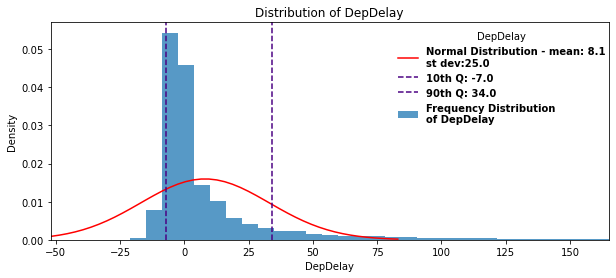

In [17]:
distribution(df_flights, 'DepDelay', 0.1, 0.90)

Let me explain how I designed the __distribution__ function to work, first I pass the entire dataframe that I cleaned up __df_fights__. Then I dropped the uppermost 1% values to limit the xaxis range and proceed to slice the dataframe using the second function parameter __col__, this is the delay time column - Departure Delays - onto which we are creating a histogram. The next two variables in my function are low and high, which represent our quantile limits. 

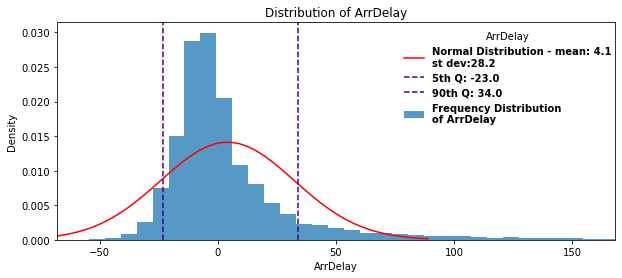

In [18]:
distribution(df_flights, 'ArrDelay',0.05, 0.9, debug=False)

That looks pretty good, it needs more a little more formatting but it provides a clear idea of the distribution, skeness, mean and standard deviation. I still need more information about each carrier distribution, so in my next function I'll add a boxplot next to the overall distribution. 

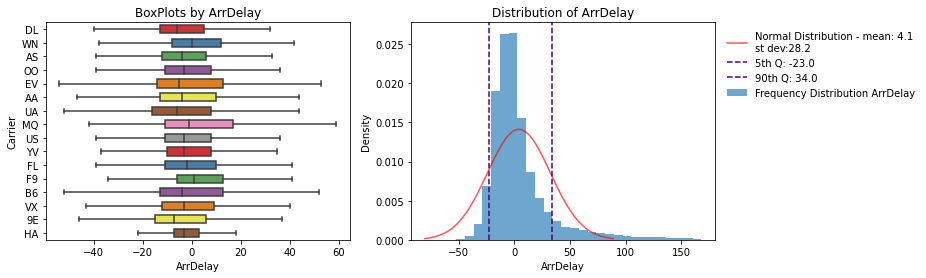

In [19]:
def dist_box(data, low, high, debug=False, col=False):
    from matplotlib import pyplot as plt
    import scipy.stats as stats, numpy as np

    #instantiate figure
    rows= 1
    cols= 2
    fig, axs= plt.subplots(rows, cols, figsize=(12,4))
    opacity= 0.65
    opacity1= 0.55
         
    #drop most extreme values
    qlow= data[col].quantile(0)
    qhigh= data[col].quantile(0.99)
    data= data[(data[col]<qhigh)& (data[col]>qlow)]
    
    #boxplot
    fliers=dict(markerfacecolor='0.5', markersize=5)
    sns.boxplot(x='ArrDelay', y= 'Carrier', data=data, ax= axs[0], palette='Set1', orient='h',
               width=0.6, flierprops=fliers, showfliers=False)
    axs[0].title.set_text('BoxPlots by {}'.format('ArrDelay'))
    
    #density plot
    axs[1].hist(data[col], bins=30, density=True, label=('Frequency Distribution {}'.format(col)), alpha=opacity)
  
    #obtain sample parameters
    mean, st_d = np.mean(data[col]), np.std(data[col])
    mode= stats.mode(data[col])[0]
    min_val= data[col].min()
    max_val= data[col].max()
    
    if debug:
        print(mean, st_d, min_val, max_val)
        
    #create normal curve using sample parameters
    x_normal = np.linspace(mean-3*st_d, mean+3*st_d)
    axs[1].plot(x_normal, stats.norm.pdf(x_normal, mean, st_d), color='r', 
                label='Normal Distribution - mean: {:.1f}\nst dev:{:.1f}'.format(round(mean,2), round(st_d,2)),
                alpha=opacity)
    
    #limit quantiles
    low_quant= data[col].quantile(low)
    high_quant= data[col].quantile(high)
    
    plt.axvline(x=low_quant, color='indigo', 
                linestyle='--',
                label='{:.0f}th Q: {}'.format(low*100,round(low_quant,2)))
    plt.axvline(x=high_quant, color='indigo', 
                linestyle='--',
                label='{:.0f}th Q: {}'.format(high*100,round(high_quant,2)))
    
    axs[1].set_xlabel(col)
    axs[1].set_ylabel('Density')
    axs[1].legend(frameon=False, bbox_to_anchor=(1.01,1))
    axs[1].title.set_text('Distribution of {}'.format(col))
    
    return plt.show()

dist_box(df_flights, 0.05, 0.9, col='ArrDelay')  

Next, I'll plot the delays in a scatterplot by airline, my goal is to see the on-time performance for each flight.

In [73]:
def better_scatterplot(data, x_data, y_data, hue_data=False, size_data=False):
    plt.figure(figsize=(10,8))
    
    #drop most extreme values
    qlow= data[x_data].quantile(0)
    qhigh= data[x_data].quantile(0.99)
    data= data[(data[x_data]<qhigh)& (data[x_data]>qlow)]
    
    x= data[x_data]
    y= data[y_data]
    
    sns.set_style('whitegrid')
    ax= sns.scatterplot(x=x, y=y, data= data, hue=hue_data, hue_order= sorted(data[hue_data]), 
                        size= size_data, sizes= (10,200),
                       edgecolor='black', palette='magma', alpha=0.5)
   
    ax.set(xlabel= x_data, ylabel=y_data)
    ax.legend(bbox_to_anchor=(1.01,1))
    plt.show()

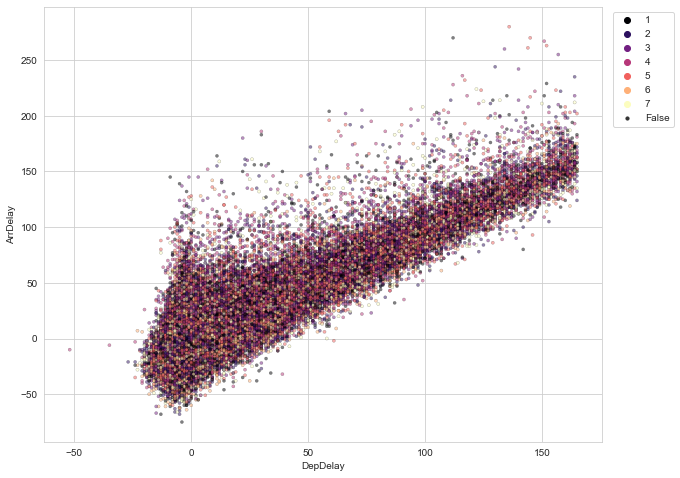

In [75]:
better_scatterplot(df_flights, 'DepDelay', 'ArrDelay', 'DayOfWeek')